In [ ]:
import numpy as np
import pandas as pd 
import plotly as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Embarked'] = np.where(df['Embarked'].isna(),df['Embarked'].mode(),df['Embarked'])

In [ ]:
df.groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,216
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [ ]:
df.drop(columns=['Age']).dropna().groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,176,176,176,176,176,176,176,176,176,176
2,16,16,16,16,16,16,16,16,16,16
3,12,12,12,12,12,12,12,12,12,12


In [ ]:
#df['Cabin'] = np.where(df['Cabin'].isna(),'X',df['Cabin'])

In [ ]:
#df['Cabin'] = df['Cabin'].apply(lambda x: x[0:1])

In [ ]:
df['Alone'] = (df['SibSp'] + df['Parch']) >0

In [ ]:
df = df.drop(['Parch', 'SibSp', 'Name','Cabin'],axis = 1)

In [ ]:
df['Ticket_prefix'] = df['Ticket'].str.split()

In [ ]:
def get_prefix(arr):
  if len(arr) > 1 :
    p = arr[0].replace('.','')
    p = p.replace('/','')
  else:
    p = 'X'
  return p
def get_number(arr):
  return arr[-1]

In [ ]:
#df['Ticket_number'] = df.Ticket_number.apply(get_number)

In [ ]:
df['Ticket_prefix'] = df.Ticket_prefix.apply(get_prefix)

In [ ]:
#
df['Ticket_prefix'].unique

<bound method Series.unique of 0          A5
1          PC
2      STONO2
3           X
4           X
        ...  
886         X
887         X
888        WC
889         X
890         X
Name: Ticket_prefix, Length: 891, dtype: object>

In [ ]:
df = df.drop(['Ticket'], axis = 1)

In [ ]:
df['Ticket_prefix'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS',
       'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [ ]:
#df['Ticket_number'] = df['Ticket_number'].replace('LINE',0)
#df['Ticket_number'] = df['Ticket_number'].astype(float)
#df =df.drop(columns=['Ticket_number'])

In [ ]:
#df['Ticket_number'] = df['Ticket_number'].replace(0,df['Ticket_number'].min()-1)

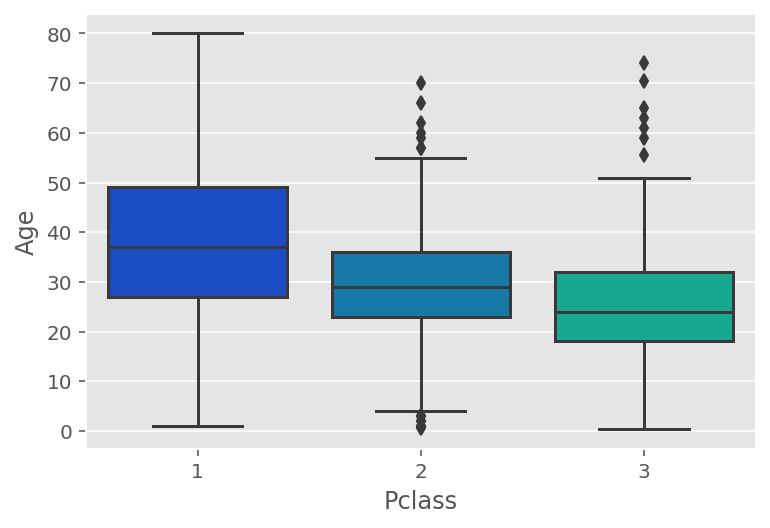

In [ ]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'winter')

In [ ]:
df.dropna()[['Age','Pclass','Fare']].corr()['Age']

Age       1.000000
Pclass   -0.369226
Fare      0.096067
Name: Age, dtype: float64

In [ ]:
def transform_columns(column):
    Age = column[0]
    Pclass = column[1]
    
    if(pd.isna(Age)):
       if(Pclass == 1):
            return np.random.randint(27,47)
       elif(Pclass == 2):
            return np.random.randint(25,35)   
       else:
            return np.random.randint(18,31)  
    else:
       return Age

df['Age'] = df[['Age', 'Pclass']].apply(transform_columns, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    object 
 4   Age            891 non-null    float64
 5   Fare           891 non-null    float64
 6   Embarked       891 non-null    object 
 7   Alone          891 non-null    bool   
 8   Ticket_prefix  891 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.7+ KB


In [ ]:
df = df.drop('PassengerId',axis = 1)

In [ ]:
categorical_cols = df.columns[df.dtypes==object].tolist()
categorical_cols

['Sex', 'Embarked', 'Ticket_prefix']

In [ ]:
for col in categorical_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

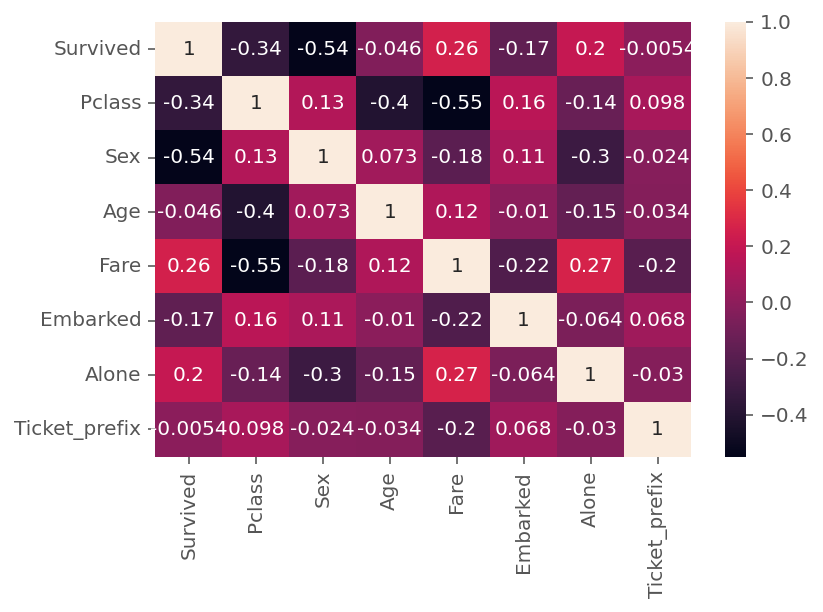

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
#df = df.drop(columns = ['Ticket_prefix'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Ticket_prefix
0,0,3,1,22.0,7.2500,2,True,1
1,1,1,0,38.0,71.2833,0,True,9
2,1,3,0,26.0,7.9250,2,False,25
3,1,1,0,35.0,53.1000,2,True,29
4,0,3,1,35.0,8.0500,2,False,29


In [ ]:
from sklearn.ensemble import RandomForestClassifier

num_features = 9
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(df.drop(columns='Survived'), df['Survived'])
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = df.columns[fs_indices_rfi].values
best_features_rfi

array(['Sex', 'Age', 'Pclass', 'Survived', 'Alone', 'Fare', 'Embarked'],
      dtype=object)

In [ ]:
model_rfi.score(df.drop(columns='Survived'), df['Survived'])

0.9910213243546577

In [ ]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.28639809, 0.26851737, 0.25714968, 0.08391339, 0.04666564,
       0.0338202 , 0.02353563])

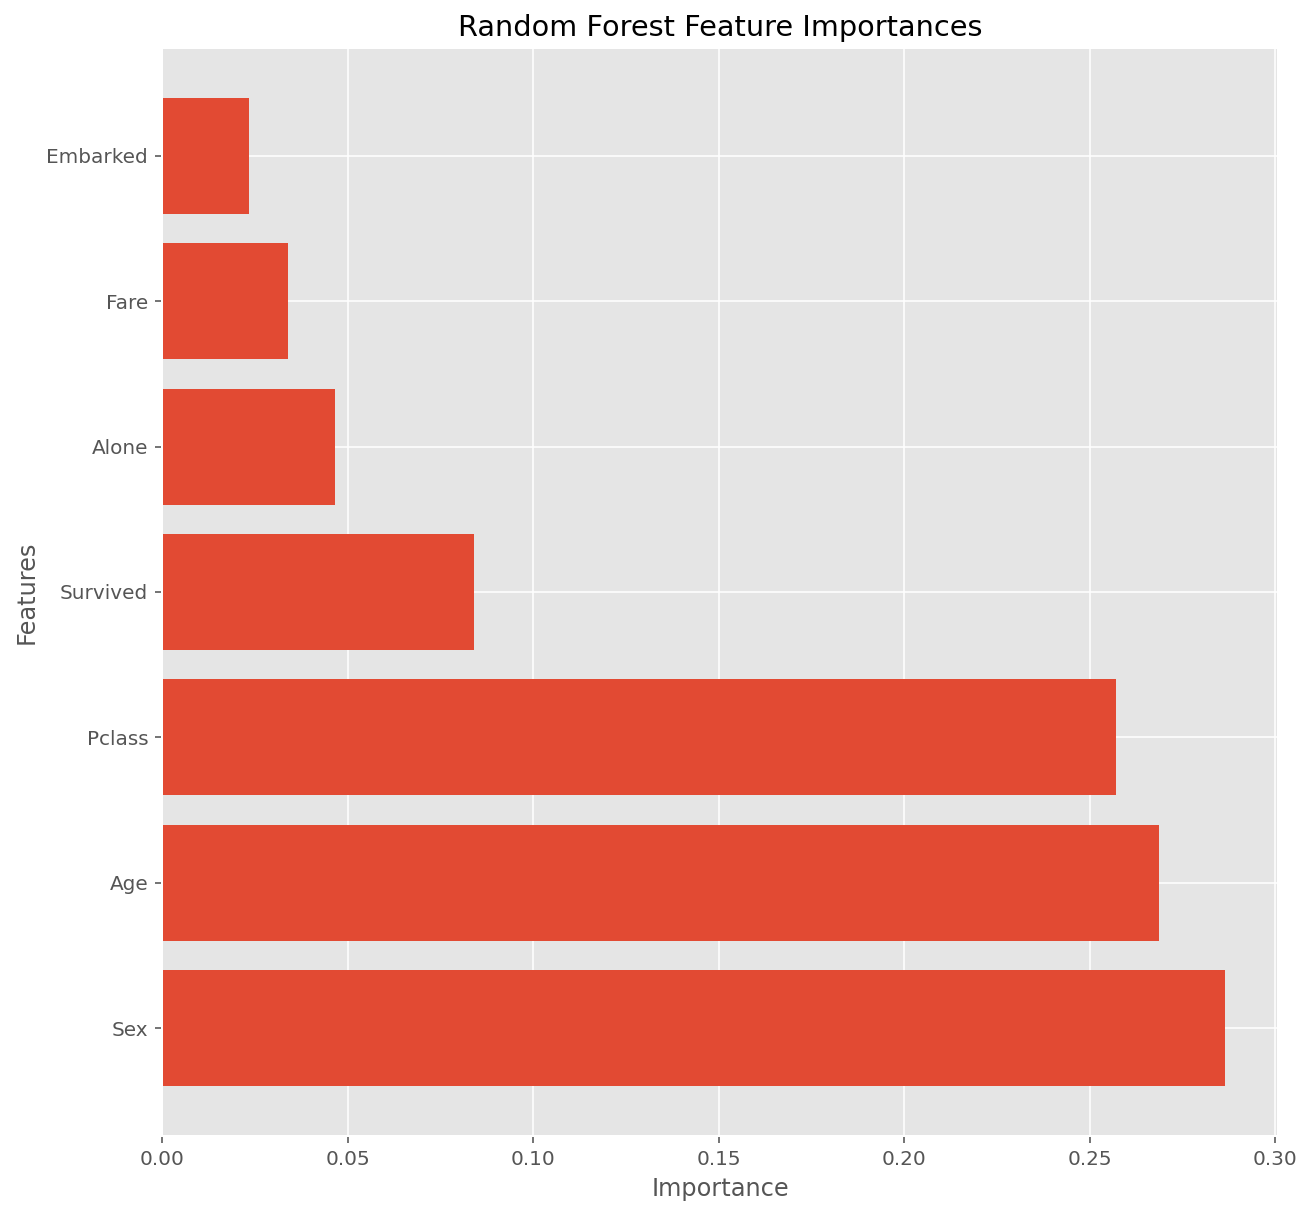

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name): 
    plt.figure(figsize=(10,10))
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In [ ]:
X = df.drop(columns= 'Survived')
y = df['Survived']

In [ ]:
inp_df = X.copy()
Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(X)
X = Data_scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X, columns=inp_df.columns).sample(15, random_state=999)

,Pclass,Sex,Age,Fare,Embarked,Alone,Ticket_prefix
857,0.0,1.0,0.635587,0.051822,1.0,0.0,1.000000
666,0.5,1.0,0.308872,0.025374,1.0,0.0,1.000000
350,1.0,1.0,0.283740,0.018006,1.0,0.0,1.000000
90,1.0,1.0,0.359135,0.015713,1.0,0.0,1.000000
583,0.0,1.0,0.447097,0.078319,0.0,0.0,1.000000
545,0.0,1.0,0.798944,0.050749,1.0,0.0,1.000000
691,1.0,0.0,0.044986,0.026188,0.0,1.0,1.000000
170,0.0,1.0,0.761247,0.065388,1.0,0.0,1.000000
40,1.0,0.0,0.497361,0.018494,1.0,1.0,1.000000
180,1.0,0.0,0.308872,0.135753,1.0,1.0,0.137931


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("R2 score on Traing set: %.2f"% rf_reg.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% rf_reg.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))

R2 score on Traing set: 0.99
R2 score on Testing set: 0.78
Mean squared error: 0.22


In [ ]:
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
logis_model.fit(X_train, y_train)
y_pred= logis_model.predict(X_test)
print("R2 score on Traing set: %.2f"% logis_model.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% logis_model.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))

R2 score on Traing set: 0.79
R2 score on Testing set: 0.80
Mean squared error: 0.20


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred= ada_model.predict(X_test)
print("R2 score on Traing set: %.2f"% ada_model.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% ada_model.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))

R2 score on Traing set: 0.83
R2 score on Testing set: 0.80
Mean squared error: 0.20


In [ ]:
from sklearn.ensemble import StackingClassifier
models = [
    ('lr', logis_model),   
    ('ran', rf_reg), 
    ('ada', ada_model)
    ]
stack_model = StackingClassifier(estimators = models, passthrough=True)
stack_model.fit(X_train, y_train)
y_pred= stack_model.predict(X_test)
print("R2 score on Traing set: %.2f"% stack_model.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% stack_model.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))

R2 score on Traing set: 0.94
R2 score on Testing set: 0.82
Mean squared error: 0.18


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic/test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#test['Cabin'] = np.where(test['Cabin'].isna(),'XX',test['Cabin'])
test['Embarked'] = np.where(test['Embarked'].isna(),test['Embarked'].mode(),test['Embarked'])
test['Fare'] = np.where(test['Fare'].isna(),test['Fare'].mode(),test['Fare'])
test['Age'] = test[['Age', 'Pclass']].apply(transform_columns, axis = 1)
test['Alone'] = (test['SibSp'] + test['Parch']) >0
test = test.drop(['Parch', 'SibSp', 'Name', 'Cabin'],axis = 1)
test['Ticket_prefix'] = test['Ticket'].str.split()
#test['Ticket_number'] = test['Ticket_prefix']
#test['Ticket_number'] = test.Ticket_number.apply(get_number)
test['Ticket_prefix'] = test.Ticket_prefix.apply(get_prefix)
test = test.drop(['Ticket'], axis = 1)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Age            418 non-null    float64
 4   Fare           418 non-null    float64
 5   Embarked       418 non-null    object 
 6   Alone          418 non-null    bool   
 7   Ticket_prefix  418 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 23.4+ KB


In [ ]:
#test['Ticket_number'] = test['Ticket_number'].astype(float)
index = test['PassengerId']
test = test.drop('PassengerId',axis = 1)
categorical_cols = test.columns[test.dtypes==object].tolist()
categorical_cols
for col in categorical_cols:
    test[col] = test[col].astype('category')
    test[col] = test[col].cat.codes

In [ ]:
inp_df = test.copy()
Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(test)
test = Data_scaler.fit_transform(test)


In [ ]:
pd.DataFrame(test, columns=inp_df.columns).sample(5, random_state=999)

,Pclass,Sex,Age,Fare,Embarked,Alone,Ticket_prefix
317,0.5,1.0,0.248319,0.020495,1.0,0.0,1.000000
344,1.0,1.0,0.301068,0.028302,1.0,1.0,0.074074
221,1.0,1.0,0.274693,0.015713,1.0,0.0,1.000000
287,0.0,1.0,0.314256,0.160574,1.0,1.0,1.000000
219,1.0,1.0,0.235131,0.015713,1.0,0.0,1.000000


In [ ]:
predic = ada_model.predict(test)

In [ ]:
submission = pd.DataFrame(index)
submission["Survived"] = predic

submission.to_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic/submission.csv", index=False)